In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
mean_01 = np.array([1.5, 4.0])
mean_02 = np.array([-1.0, -1.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.9, 0.3], [0.3, 0.9]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02

print data.shape, data.mean(axis=0)

labels = np.zeros((data.shape[0],))
labels[:dist_01.shape[0]] = 1

print labels.shape, labels.mean()

(500, 2) [ 0.23032491  1.52607176]
(500,) 0.5


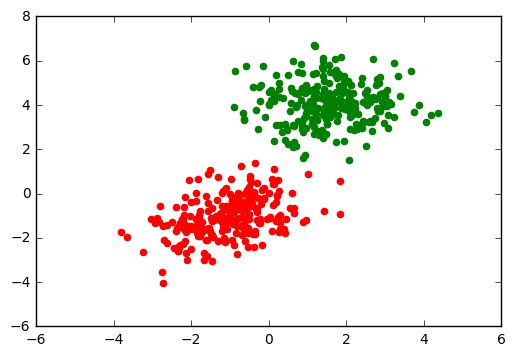

In [7]:
plt.figure(0)
for ix in range(data.shape[0]):
    if labels[ix] == 0:
        plt.scatter(data[ix, 0], data[ix, 1], color='red')
    else:
        plt.scatter(data[ix, 0], data[ix, 1], color='green')
plt.show()

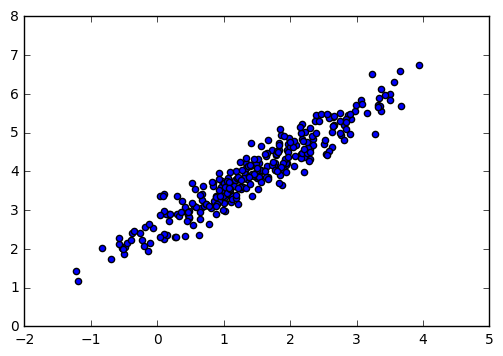

[ 2.50628828 -0.23746628  1.82743749  1.48519767  1.7649499 ]
[ 4.71611063  2.24372721  4.7238522   4.25513422  4.2057146 ]


In [111]:
cov_val = [[1, 0.95], [0.95, 1]]

dt = np.random.multivariate_normal(mean_01, cov_val, 300)

plt.scatter(dt[:, 0], dt[:, 1])
plt.show()

X = dt[:, 0]
y = dt[:, 1]

print X[:5]
print y[:5]

In [112]:
def h_val(x_data, theta=None):
    # input x_data: numpy array
    #m = len(x_data)
    h = theta[0]*x_data + theta[1]
    #for ix in range(m):
    #    h += x_data[ix]*theta[ix]
    #h += 1.0*theta[-1]
    return h

def decide(x_data, theta):
    h = hval(x_data, theta)
    if h > 0.5:
        return 1
    else:
        return 0

def compute_loss_regression(X, theta, y):
    # Returns loss for X, y and theta values
    n = X.shape[0]
    loss = 0.0
    
    for nx in range(n):
        error = (y[nx] - h_val(X[nx], theta))**2
        loss += error
    loss = loss/n
    return loss

def compute_loss_grad(X, theta, y):
    n = X.shape[0]
    grad1 = 0.0
    grad2 = 0.0
    for nx in range(n):
        error1 = (h_val(X[nx], theta) - y[nx])*X[nx]
        grad1 += error1
        
        error2 = (h_val(X[nx], theta) - y[nx])
        grad2 += error2
    grad1 = grad1/n
    grad2 = grad2/n
    return [grad1, grad2]

def update_weights(X, theta, y, alpha=0.1):
    grad = compute_loss_grad(X, theta, y)
    theta[0] = theta[0] - alpha*grad[0]
    theta[1] = theta[1] - alpha*grad[1]
    return theta

In [137]:
## theta = [1, 2.0]
theta = [np.random.random(), np.random.random()]
nb_epoch = 200
alpha = 0.05

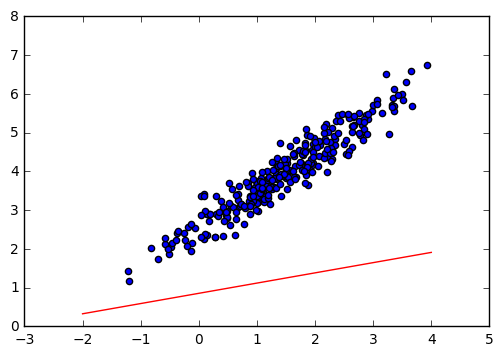

In [138]:
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()

Error at Epoch 0: 0.212431897044


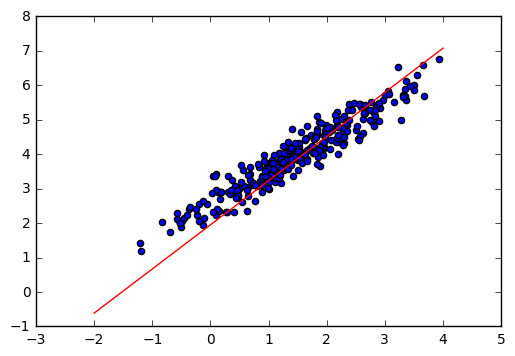

In [215]:
all_loss = []
nb_epoch = 1
alpha = 0.001
for ix in range(nb_epoch):
    loss = compute_loss_regression(X, theta, y)
    all_loss.append(loss)
    if ix%10 == 0:
        print "Error at Epoch {0}:".format(ix), loss
    theta = update_weights(X, theta, y, alpha)
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()

0.0980768886318
[1.0276760943455867, 2.4444987702304308]


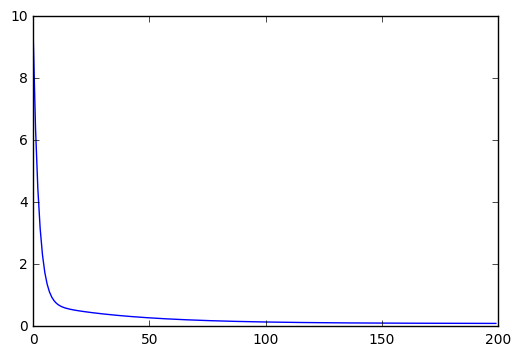

In [134]:
plt.plot(all_loss)
print all_loss[-1]
print theta
plt.show()

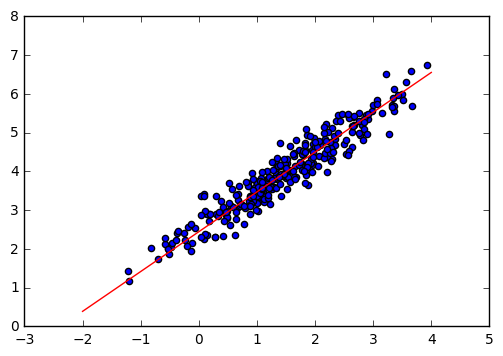

In [135]:
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()